In [1]:
from functions_and_tools import (
    update_new_schedule_tool,
    create_schedule_tool,
    read_day_schedule_tool,
    get_passengers_at_t_tool,
    plot_passenger_count_on_time_tool,
    max_passengers_on_track_tool,
    confirm_schedule_tool,
)
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner
from llama_index.core.agent import ReActAgent
from llama_index.agent.openai import OpenAIAgent

<jemalloc>: Unsupported system page size


## Define set of tools to use

In [2]:
tools = [
    update_new_schedule_tool,
    create_schedule_tool,
    read_day_schedule_tool,
    get_passengers_at_t_tool,
    plot_passenger_count_on_time_tool,
    max_passengers_on_track_tool,
    confirm_schedule_tool,
]

## Data Agent
I used ReActAgent, FunctionCallingAgentWorker and OpenAIAgent successfully.

ReActAgent only gave reliable results using gpt-4.

In [3]:
prefix_messages = [
    ChatMessage(
        role="system",
        content=(
            "You are a helpful assistant."
            "Use the tools provided to answer the questions."
            "Do not make up any details."
        ),
    )
]

In [4]:
## FunctionCallingAgentWorker
worker = FunctionCallingAgentWorker(
    tools=tools,
    llm=OpenAI(model='gpt-3.5-turbo'),
    prefix_messages=prefix_messages,
    verbose=True
)
agent = AgentRunner(worker)

## OpenAIAgent
# agent = OpenAIAgent.from_tools(
#     tools,
#     llm=OpenAI(model='gpt-3.5-turbo'),
# )

## ReActAgent
# agent = ReActAgent.from_tools(
#     tools,
#     llm = OpenAI(model='gpt-4'),
# )

## Chat

- Get maximum passengers for a given date
- Plot passengers for that day

Added user message to memory: 
    I want to analyze the schedules for 2024-01-01.
    Can you tell me what's the maximum number of passengers for that day?
    Also, plot the number of passengers.
    
=== Calling Function ===
Calling function: read_day_schedules with args: {"day": "2024-01-01"}
=== Function Output ===
[{'id': 'alrt', 'start_time': datetime.datetime(2024, 1, 1, 16, 0), 'end_time': datetime.datetime(2024, 1, 1, 18, 0), 'passengers': 50}, {'id': 'vjku', 'start_time': datetime.datetime(2024, 1, 1, 17, 0), 'end_time': datetime.datetime(2024, 1, 1, 19, 0), 'passengers': 530}, {'id': 'poeq', 'start_time': datetime.datetime(2024, 1, 1, 5, 0), 'end_time': datetime.datetime(2024, 1, 1, 7, 0), 'passengers': 200}, {'id': 'lwrm', 'start_time': datetime.datetime(2024, 1, 1, 10, 0), 'end_time': datetime.datetime(2024, 1, 1, 11, 0), 'passengers': 300}, {'id': 'lorw', 'start_time': datetime.datetime(2024, 1, 1, 10, 30), 'end_time': datetime.datetime(2024, 1, 1, 11, 30), 'passengers':

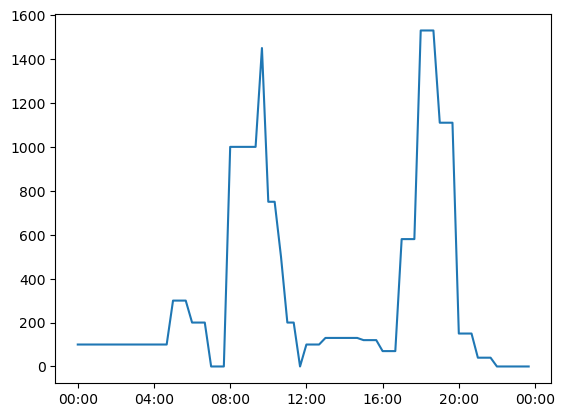

=== Function Output ===
True
=== LLM Response ===
The maximum number of passengers on January 1, 2024, is 1530. 

I have also plotted the number of passengers throughout the day.
assistant: The maximum number of passengers on January 1, 2024, is 1530. 

I have also plotted the number of passengers throughout the day.


In [5]:
response = agent.chat(
    """
    I want to analyze the schedules for 2024-01-01.
    Can you tell me what's the maximum number of passengers for that day?
    Also, plot the number of passengers.
    """
    )
print(response)

## User can create new schedules
- Agent is able to both read and write from the source.
- New schedules will be updated on the source.

In [6]:
response = agent.chat("Please generate a new schedule")
print(response)

Added user message to memory: Please generate a new schedule
=== Calling Function ===
Calling function: create_schedule with args: {}
=== Function Output ===
New schedule created with id gkcd, but not yet confirmed. Please provide day, start_time, end_time, and passengers.
=== LLM Response ===
I have created a new schedule with ID "gkcd." Could you please provide the details for the day, start time, end time, and number of passengers for this schedule?
assistant: I have created a new schedule with ID "gkcd." Could you please provide the details for the day, start time, end time, and number of passengers for this schedule?


In [7]:
response = agent.chat(
    """
    The day is "2024-01-01", the time is from "11:15" to "16:20" for 1100 passengers.
    If all information is correct, confirm it.
    """
)
print(response)

Added user message to memory: 
    The day is "2024-01-01", the time is from "11:15" to "16:20" for 1100 passengers.
    If all information is correct, confirm it.
    


=== Calling Function ===
Calling function: update_schedule with args: {"id": "gkcd", "property": "day", "value": "2024-01-01"}
=== Function Output ===
new_schedule ID gkcd updated with day = 2024-01-01
=== Calling Function ===
Calling function: update_schedule with args: {"id": "gkcd", "property": "start_time", "value": "11:15"}
=== Function Output ===
new_schedule ID gkcd updated with start_time = 11:15
=== Calling Function ===
Calling function: update_schedule with args: {"id": "gkcd", "property": "end_time", "value": "16:20"}
=== Function Output ===
new_schedule ID gkcd updated with end_time = 16:20
=== Calling Function ===
Calling function: update_schedule with args: {"id": "gkcd", "property": "passengers", "value": "1100"}
=== Function Output ===
new_schedule ID gkcd updated with passengers = 1100
=== Calling Function ===
Calling function: confirm_schedule with args: {"id": "gkcd"}
=== Function Output ===
True
True


## New plot with updated schedule

Added user message to memory: Plot passengers for 2024-01-01


=== Calling Function ===
Calling function: read_day_schedules with args: {"day": "2024-01-01"}
=== Function Output ===
[{'id': 'alrt', 'start_time': datetime.datetime(2024, 1, 1, 16, 0), 'end_time': datetime.datetime(2024, 1, 1, 18, 0), 'passengers': 50}, {'id': 'vjku', 'start_time': datetime.datetime(2024, 1, 1, 17, 0), 'end_time': datetime.datetime(2024, 1, 1, 19, 0), 'passengers': 530}, {'id': 'poeq', 'start_time': datetime.datetime(2024, 1, 1, 5, 0), 'end_time': datetime.datetime(2024, 1, 1, 7, 0), 'passengers': 200}, {'id': 'lwrm', 'start_time': datetime.datetime(2024, 1, 1, 10, 0), 'end_time': datetime.datetime(2024, 1, 1, 11, 0), 'passengers': 300}, {'id': 'lorw', 'start_time': datetime.datetime(2024, 1, 1, 10, 30), 'end_time': datetime.datetime(2024, 1, 1, 11, 30), 'passengers': 200}, {'id': 'aqwc', 'start_time': datetime.datetime(2024, 1, 1, 12, 0), 'end_time': datetime.datetime(2024, 1, 1, 14, 0), 'passengers': 100}, {'id': 'dtgv', 'start_time': datetime.datetime(2024, 1, 1, 

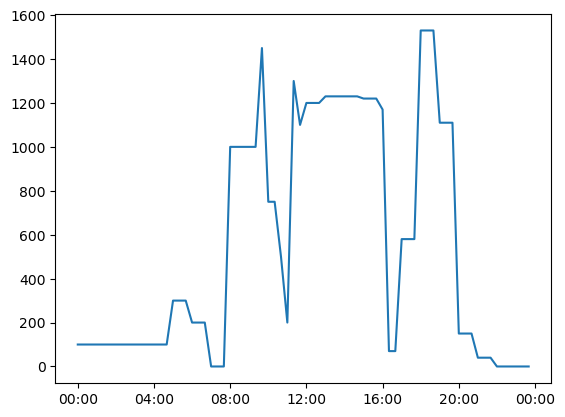

=== Function Output ===
True
=== LLM Response ===
The plot for the number of passengers on January 1, 2024, has been generated successfully.
assistant: The plot for the number of passengers on January 1, 2024, has been generated successfully.


In [8]:
response = agent.chat("Plot passengers for 2024-01-01""")
print(response)